# Project Description 
You are an analyst at a big online store. Together with the marketing
department, you've compiled a list of hypotheses that may help boost
revenue.

# Project's Goal
Prioritize hypotheses, launch an A/B test, and analyze the results.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Load, overview and prepare the data</h2>
</div>

table formatting

In [7]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border: 1px solid lightgray;
    }
</style>

Import libraries

In [8]:
pip install matplotlib==3.4.0

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.3 MB 805 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings
import math as mth
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter
import scipy.stats as stats


In [11]:
pd.set_option('max_colwidth', 400)

In [12]:
#ignorning warnings
warnings.simplefilter('ignore')

make a try-except block in order to avoid file path error when working both locally and remotely:

In [13]:
try:
    hypotheses = pd.read_csv('hypotheses_us.csv',sep=';')
    orders = pd.read_csv('orders_us.csv',sep=',')
    visits = pd.read_csv('visits_us.csv',sep=',')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
    orders = pd.read_csv('/datasets/orders_us.csv',sep=',')
    visits = pd.read_csv('/datasets/visits_us.csv',sep=',')

Check the tables first 5 rows to see the general information.

In [4]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [8]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Check the tables general structure

In [9]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [11]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


converting date from object type to datetype

In [14]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

checking for duplicates:

In [13]:
hypotheses.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

In [15]:
visits.duplicated().sum()

0

lower casing all column names

In [15]:
hypotheses.columns = [x.lower() for x in hypotheses.columns]
orders.columns = [x.lower() for x in orders.columns]
visits.columns = [x.lower() for x in visits.columns]

Checking for visitors that might have gotten into both group A and group B.

In [16]:
orders_a = orders.query('group == "A"')['visitorid'].to_list()
orders_b = orders.query('group == "B"')['visitorid'].to_list()

checking for visitor id that appears in both lists

In [17]:
both = [x for x in orders_a if x in orders_b]

checking the amount of different(measuring length of set to get unique ids) visitors that appear in both groups 

In [18]:
len(set(both))

58

dropping the visitor ids that appear in both groups

In [19]:
orders = orders[~orders['visitorid'].isin(both)]

### Coclusion:
We loaded & reviewed our data, checked for no duplicates or missing data.

Lowercased columns names, made datatype conversion for all date columns, and removed visitors(58) that appeared in both groups.

We cant avoid dropping them because they have been exposed to both groups.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prioritizing Hypotheses</h2>
</div>

### Prioritize hypotheses by the ICE and RICE framework. (Sorting in descending order of priority for each framework for comparison.)

calculating ICE for each hypothesis and printing:

In [20]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort'])
hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE',ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


calculating RICE for each hypothesis and printing:

In [22]:
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort'])
hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE',ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


#### Description & conclusion:

We see the prioritization of hypotheses changes when you use RICE instead of ICE.

This happens because the Reach parameter is not calculated in ICE, and we dont take into account how many users it will affect.

We see hypothesis #7 is ranked first when using RICE, and thats because it's Reach parameter is 10, the highest out of all hypotheses and the highest possible rank (1-10), compared to hypothesis #8 who's the strongest when using ICE, with a reach level of 1.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>A/B Test Analysis</h2>
</div>

Creating cumulative dataframe:

In [24]:
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [28]:
ordersAggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [23]:
# building an array with unique paired date-group values
datesGroups = orders[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] \
                    <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', \
                    'group' : 'max', 'transactionid' : pd.Series.nunique, \
                    'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# getting aggregated cumulative daily data on visitors  
visitorsAggregated = (datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], 
visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group']))

# merging the two tables and giving descriptive column names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

viewing the head of our new cumulative df:

In [46]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


### Cumulative revenue by group

plotting cumulative revenue by group:

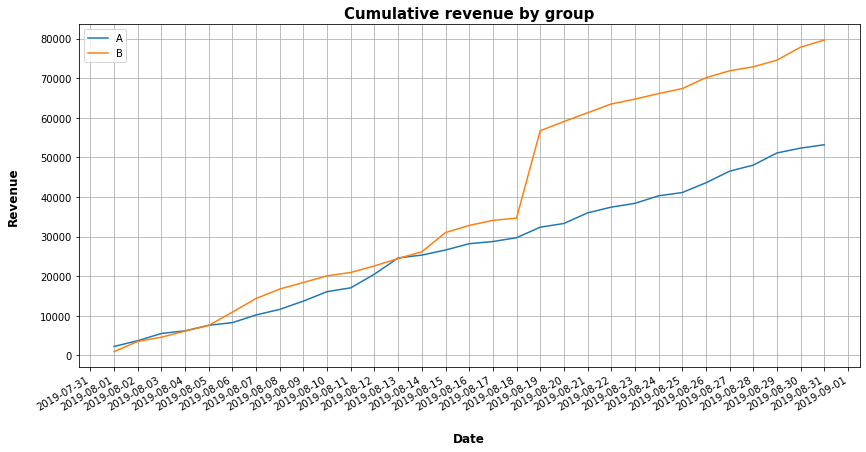

In [47]:

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
ax.set_title("Cumulative revenue by group",weight='bold',size=15)
ax.set_xlabel("Date", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Revenue", labelpad=20, weight='bold', size=12)

#xticks per day
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
fig.autofmt_xdate()

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.legend();

#### Description & conclusion:

This graph shows our Revenue is rising steadily throughout the whole test in both groups. 

However, we can see that Group B surpasses groups a's cumulative revenue after 5 days in the test.

Group B also has a big spike on 18/8, This may imply either a surge in the number of orders or the presence of very expensive orders(could be an outlier).

### Cumulative average order size by group

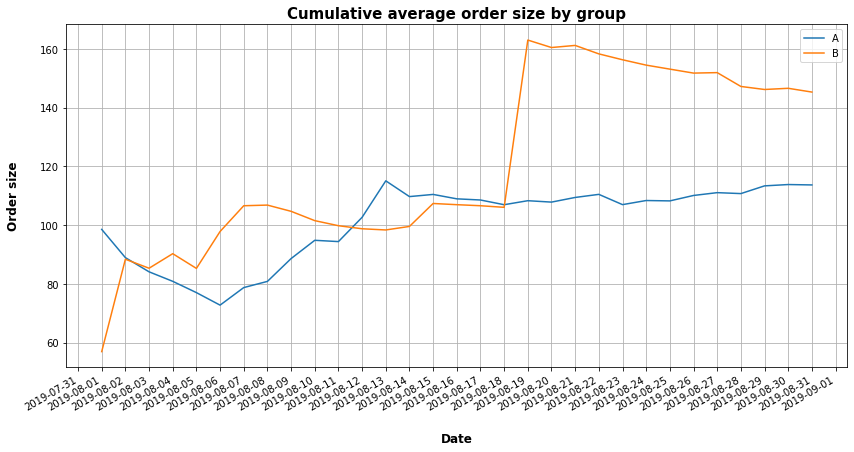

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

ax.set_title("Cumulative average order size by group",weight='bold',size=15)
ax.set_xlabel("Date", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Order size", labelpad=20, weight='bold', size=12)

#xticks per day
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
fig.autofmt_xdate()

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.legend();

#### Description & conclusions:
This graph shows our cumulative average order size by group. 

We see Group A's average order size has shrinked in the first week, and then rose, became steady and stabilized around order size of 110~.

On the other hand, we see group B had several spikes, with the biggest surge on 18/8. afterwards it decreases to finish around order size of 140~.

Group B also has a big spike on 18/8, This may imply either a surge in the number of orders or the presence of very expensive orders.
Average purchase size becomes steady by the end of the test, too: it stabilizes for group A and keeps on falling for group B. The surge in group B on 18/8 may have been due to the presence of large, expensive orders.

We need more data on group B to find the true average purchase size and establish its level.

### Relative difference in cumulative average order size for group B compared with group A

In [27]:
# merge the data into one df
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 

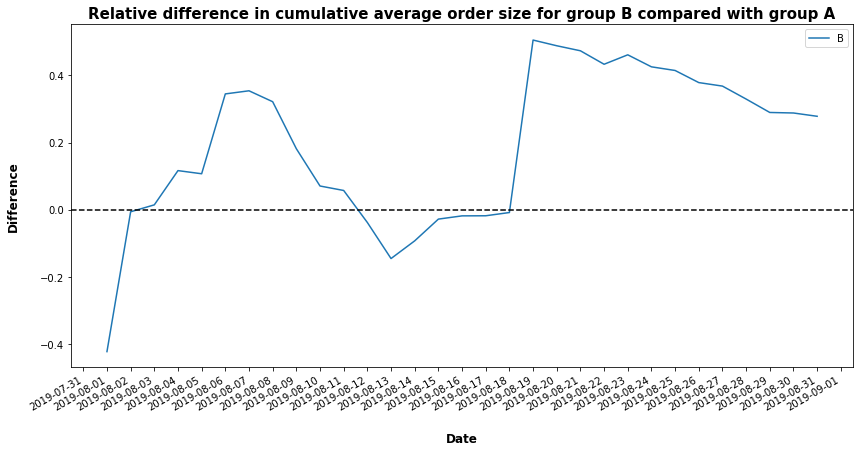

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

ax.set_title("Relative difference in cumulative average order size for group B compared with group A",weight='bold',size=15)
ax.set_xlabel("Date", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Difference", labelpad=20, weight='bold', size=12)

#xticks per day
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
fig.autofmt_xdate()

# plotting the relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,label='B')

plt.axhline(y=0, color='black', linestyle='--')
plt.legend();

#### Description & Conclusion:
This graph shows that group B has higher cumulative average order size, besides the first day(since 2/8) and 7 days between the 11/8 until the 18/8, where the biggest spike happend and Group B's relative difference got to above 40% higher than Group A.

Overall group B is performing better in this metric if we consider those spikes as valid data.


###  Daily conversion rates by group

In [56]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [59]:
#calculating cumulative conversion in percentages
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData['conversion_prec'] = cumulativeData['orders']/cumulativeData['visitors'] * 100

#group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
#group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

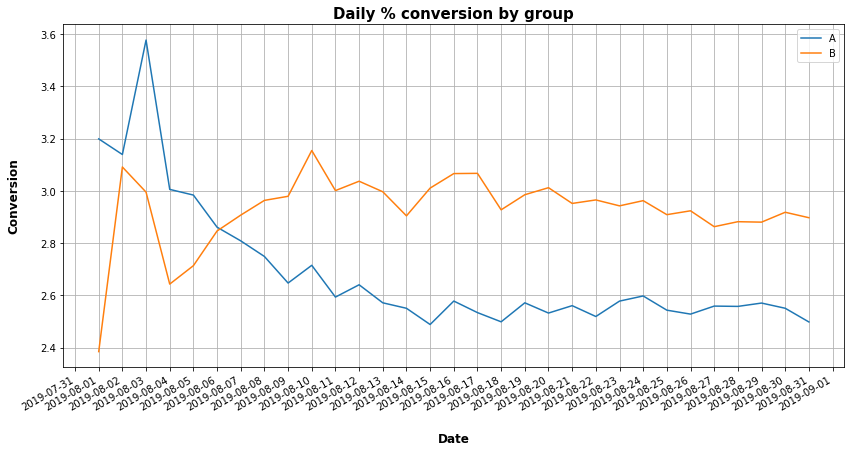

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

ax.set_title("Daily % conversion by group",weight='bold',size=15)
ax.set_xlabel("Date", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Conversion", labelpad=20, weight='bold', size=12)

#xticks per day
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
fig.autofmt_xdate()

#plotting
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion_prec'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion_prec'], label='B')
plt.grid()
plt.legend();

#### Description & conclusion:
This graph shows the daily %conversion for each group.
We see that at the first 5 days group A had more conversion than group B, and afterwards group B has the better conversion for the rest of the test.

### Number of orders per user

slicing user and amount of orders

In [31]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

defining x values and plotting scatter plot

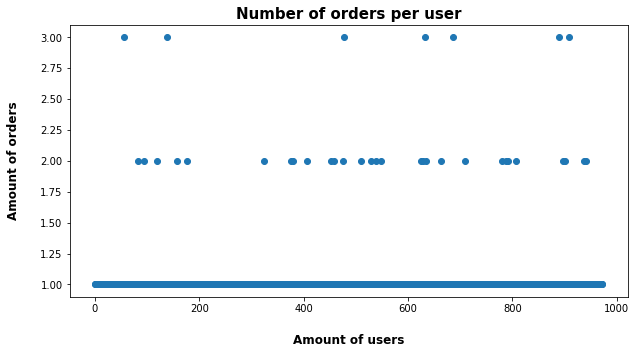

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers)))

fig, ax = plt.subplots()
fig.set_size_inches(10,5)

ax.set_title("Number of orders per user",weight='bold',size=15)
ax.set_xlabel("Amount of users", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Amount of orders", labelpad=20, weight='bold', size=12)

plt.scatter(x_values, ordersByUsers['orders']);

#### Description & conclusion:
This graph shows the vast majority of our users have 1 order, there are some users with 2 orders, and only a few with 3.

### 95th and 99th percentiles for the number of orders per user

checking the 95th and the 99th percentiles

In [33]:
np.percentile(ordersByUsers['orders'], [95, 99]) 

array([1., 2.])

#### Conclusion:
We see that atleast 95% percent of our users have 1 order, and the 99th percentile being 2 orders.

It will be reasonable to remove users with  2 or 3 orders from our data and consider them anomalies, as they sum up to be less than 5% of our data. 

### Scatter chart of order prices

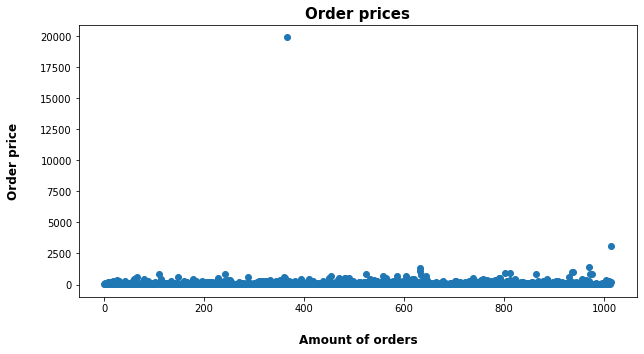

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

ax.set_title("Order prices",weight='bold',size=15)
ax.set_xlabel("Amount of orders", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Order price", labelpad=20, weight='bold', size=12)

plt.scatter(x_values, orders['revenue']);

#### Description & conclusion:
This graph shows the order prices.

We see that almost all of our orders prices are lower than 2500, with few 2 orders above 2500.
we see an extreme value at around 20000 order price, I assume this happened on the 18/8, where group B spiked.

### 95th and 99th percentiles for order prices

In [35]:
np.percentile(orders['revenue'], [95,99]) 

array([414.275, 830.3  ])

We see that atleast 95% of the orders have prices of less than 414, and the 99th percentile being 830.

It will be reasonable to set 450 as the threshold for the price, as the amount of orders that surpass that are less than 5%.

### Statistical significance of the difference in conversion between the groups using the raw data. 

calculating samples of the conversion for both groups for the test

In [36]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

#creating samples for the test
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

performing and printing the statistical significance and the relative lose / improve of group B


In [53]:
print("pvalue: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("relative difference between B to A: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 


pvalue: 0.006
relative difference between B to A: 0.160


#### Conclusion & Description:
Based on the raw data, there is a difference  in conversion between groups A and B.

The first row of the output gives us the p-value, 0.006, which is lower than 0.05. 

So we can reject the null hypothesis that there's not a statistically significant difference in conversion between the groups.

The second row shows us the relative gain of group B - 16%.

###  Statistical significance of the difference in average order size between the groups using the raw data. 

passing the the data on revenue to the mannwhitneyu() criterion, 

also printing the relative difference in average order size between the groups.

In [52]:
print('pvalue: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('relative difference between B to A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

pvalue: 0.431
relative difference between B to A: 0.278


#### Conclusion & description:
Based on the raw data, The p-value is considerably higher than 0.05, and there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. 

Nonetheless, the average order size for group B is much higher than it is for group A (27.8%).

### Statistical significance of the difference in conversion between the groups using the filtered data.

creating dfs of users with many (orders > 1) amount of orders, and users with expensive (revenue > 450) orders.

In [48]:
revenue_lim = 450

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorid']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

filtered samples for both groups:

In [49]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Applying the statistical Mann-Whitney criterion to the filtered samples:

In [50]:
print("pvalue: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("relative difference between B to A: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

pvalue: 0.006
relative difference between B to A: 0.180


#### Conclusion:

The results for conversion almost didn't change using the filtered data.

The first row of the output gives us the p-value, 0.006, which is lower than 0.05,
So we can reject the null hypothesis that there's not a statistically significant difference in conversion between the groups.

The second row shows us the relative gain of group B - 18%.

### Statistical significance of the difference in average order size between the groups using the filtered data.

In [51]:
print('pvalue: {0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print('relative difference between B to A :{0:.3f}'.format(
orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

pvalue: 0.441
relative difference between B to A :-0.009


### Conclusion:
The p-value increased a bit, but now the difference between the groups is -0.09% instead of 27.8%.

there's no reason to reject the null hypothesis and conclude that average order size differs between the groups.


### Conclusions & Decision:

- The raw data revealed a statistically significant difference in conversion between the groups, as group B had 16% higher conversion.
- The filtered data revealed a statistically significant difference in conversion between the groups, as group B had 18% higher conversion.
- The raw data showed Group B had 27% lead over group A in terms of average order size.
- The filtered data showed Group B's average order size is almost the same (-0.09%) as Group A's.
- Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.

We conclude that we should stop the test, And consider group B as the leading group in terms of conversion (+18%),
as this is a crucial metric for our goal - boosting the revenue and this gap of 18% is a big enough increase in conversion to call group B the more successful group.
